In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
data = pd.read_csv('./magic+gamma+telescope/magic04.data', names=cols)


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [4]:
print('So luong phan tu trong tap du lieu:', len(y))
print('So luong nhan can du doan:', len(y.unique()))
print('Nhan can du doan:', y.unique())
print()
print('So luong phan tu mang nhan g:', sum(y == 'g'))
print('So luong phan tu mang nhan h:', sum(y == 'h'))
print()

So luong phan tu trong tap du lieu: 19020
So luong nhan can du doan: 2
Nhan can du doan: ['g' 'h']

So luong phan tu mang nhan g: 12332
So luong phan tu mang nhan h: 6688



In [5]:
y = y.map({'g': 1, 'h': 0})

In [6]:
for i in range(len(y.unique())):
    print(f'Du lieu mau cua nhan {i}:')
    print(X[y == i].head())

Du lieu mau cua nhan 0:
        fLength   fWidth   fSize   fConc  fConc1    fAsym  fM3Long  fM3Trans  \
12332   93.7035  37.9432  3.1454  0.1680  0.1011  53.2566  89.0566   11.8175   
12333  102.0005  22.0017  3.3161  0.1064  0.0724 -54.0862  43.0553  -15.0647   
12334  100.2775  21.8784  3.1100  0.3120  0.1446 -48.1834  57.6547   -9.6341   
12335   91.6558  18.8293  2.7097  0.4386  0.3420 -52.6841 -97.8373  -17.0955   
12336   38.0195  12.6736  2.8747  0.4084  0.1928 -51.4840   8.3471    7.9620   

        fAlpha     fDist  
12332  14.1224  231.9028  
12333  88.4636  274.9392  
12334  20.7848  346.4330  
12335  63.8834  130.7998  
12336  24.5402  163.8674  
Du lieu mau cua nhan 1:
    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
print('So luong phan tu trong tap du lieu huan luyen:', len(y_train))
print('So luong phan tu trong tap du lieu kiem tra:', len(y_test))
print()

So luong phan tu trong tap du lieu huan luyen: 13314
So luong phan tu trong tap du lieu kiem tra: 5706



In [9]:
model_DT = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)
model_DT.fit(X_train, y_train)
y_pred_DT = model_DT.predict(X_test)

accuracy_DT = accuracy_score(y_test, y_pred_DT)
print(f'Do chinh xac cua Decision Tree: {100 * accuracy_DT:.2f} %')

Do chinh xac cua Decision Tree: 83.35 %


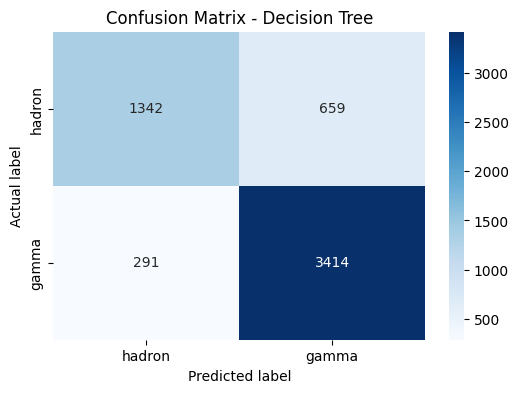

In [10]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

plt.figure(figsize=(6,4))
sns.heatmap(cm_DT, annot=True, fmt='d', cmap='Blues', xticklabels=['hadron','gamma'], yticklabels=['hadron','gamma'])
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

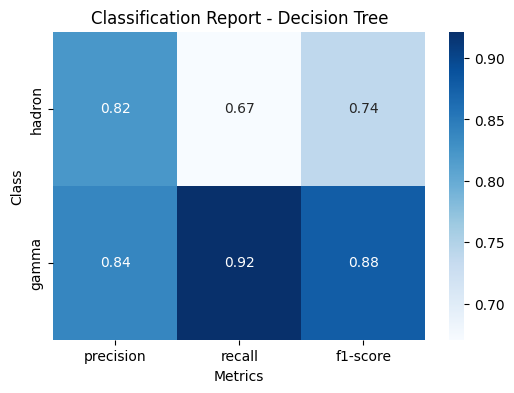

In [11]:
report = classification_report(y_test, y_pred_DT, target_names=['hadron', 'gamma'], output_dict=True)
df = pd.DataFrame(report).transpose()
df = df[df.index.isin(['hadron', 'gamma'])][['precision', 'recall', 'f1-score']]

plt.figure(figsize=(6, 4))
sns.heatmap(df, annot=True, cmap='Blues', fmt=".2f")
plt.title("Classification Report - Decision Tree")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train, y_train)
y_pred_KNN = model_KNN.predict(X_test)

print(f"Độ chính xác của KNN: {100 * accuracy_score(y_test, y_pred_KNN):.2f} %")

Độ chính xác của KNN: 83.23 %


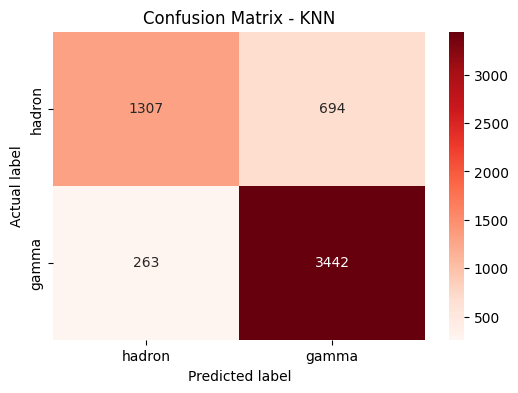

In [13]:
cm_KNN = confusion_matrix(y_test, y_pred_KNN)

plt.figure(figsize=(6,4))
sns.heatmap(cm_KNN, annot=True, fmt='d', cmap='Reds', xticklabels=['hadron','gamma'], yticklabels=['hadron','gamma'])
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix - KNN')
plt.show()

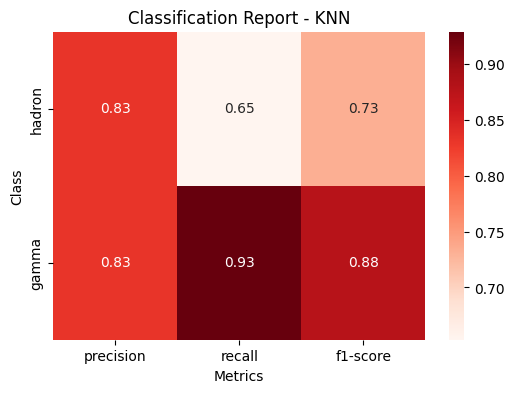

In [14]:
report = classification_report(y_test, y_pred_KNN, target_names=['hadron', 'gamma'], output_dict=True)
df = pd.DataFrame(report).transpose()
df = df[df.index.isin(['hadron', 'gamma'])][['precision', 'recall', 'f1-score']]

plt.figure(figsize=(6, 4))
sns.heatmap(df, annot=True, cmap='Reds', fmt=".2f")
plt.title("Classification Report - KNN")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.show()